# ZUCMAP: Simulating Quantum Physics with Computers 
## Split Step method applied on Schrödinger's equation

Juan Fernandez de la Garza (27 April, 2023)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
import sys

plt.style.use('dark_background')
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

/var/folders/f6/w5y8k5qs5hbg2h_fz_3rvdnh0000gn/T/ipykernel_10670/2197136687.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


### Define global variables

In [17]:
# Real space
N = 100
L = 10
h = L/N
x = np.linspace(-L/2, L/2, N)

# Momentum space
K = 2 * np.pi/h
k = np.linspace(-K/2, K/2, N)

# Time domain
Nt = 1500
tau = .001

# Kinetic step
oscil = (-1)**(np.arange(N))
expk2 = np.exp(-0.25j * tau * k**2)

### Define helper functions

In [18]:
def psi0(x):
    return np.exp( - (x - 1.0)**2 )

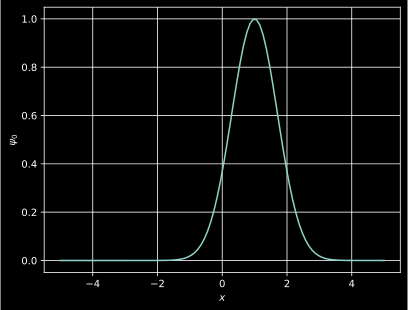

In [19]:
plt.plot(x, psi0(x))
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi_0$')
plt.grid(True)
plt.show()

In [20]:
def potential(a):
    if 1: # change this from 1 to 0 for ''finite'' well potential
        return 10 * a**2
    else:
        b = np.zeros(len(a))
        b[a < -4] = 10000
        b[a > 4] = 10000
        
        return b
        
expV = np.exp(-1j * tau * potential(x))

In [21]:
def potStep(psi):
    return expV * psi

In [22]:
def kinStep(psi):
    return oscil * ifft( expk2 * fft( oscil * psi ))

### Evolution

In [23]:
def evolve(steps):
    psi = psi0(x)

    Nt_out = int(Nt/steps)
    t_out = np.zeros(Nt_out + 1)
    psi_out = np.zeros((Nt_out + 1, N), dtype=complex)
    t_out[0] = 0
    psi_out[0] = np.copy(psi)
    
    for i in range(Nt):
        psi = kinStep(psi)
        psi = potStep(psi)
        psi = kinStep(psi)

        if np.mod((i + 1),steps) == 0:
            ct = int(i / steps) + 1
            t_out[ct] = i * tau
            psi_out[ct] = np.copy(psi)
    
        sys.stdout.write('\r'+str(i+1)+' of '+str(Nt))
    
    sys.stdout.flush()
    sys.stdout.write('\n')

    return t_out, psi_out


1500 of 1500


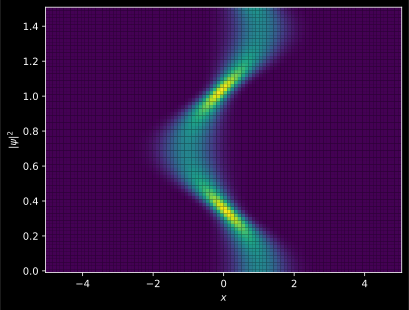

In [24]:
t_out, psi_out = evolve(20)
xx, tt = np.meshgrid(x, t_out)

plt.pcolormesh(xx, tt, abs(psi_out)**2)
plt.xlabel(r'$x$')
plt.ylabel(r'$|\psi|^2$')
# plt.grid(True)
plt.show()